#Gold Price Prediction
_________
By Ahmed Ali

##Environment set-up

In [38]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

##Data Wrangling

In [4]:
df = pd.read_csv('/content/gold_price_data (1).csv')
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01/02/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,01/03/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,01/04/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,01/07/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,01/08/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
df.shape

(2290, 6)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SPX,2290.0,1654.315776,519.111540,676.530029,1239.874969,1551.434998,2073.010070,2872.870117
GLD,2290.0,122.732875,23.283346,70.000000,109.725000,120.580002,132.840004,184.589996
USO,2290.0,31.842221,19.523517,7.960000,14.380000,33.869999,37.827501,117.480003
SLV,2290.0,20.084997,7.092566,8.850000,15.570000,17.268500,22.882500,47.259998
EUR/USD,2290.0,1.283653,0.131547,1.039047,1.171313,1.303297,1.369971,1.598798


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


##Data Cleaning

In [13]:
df.duplicated().sum()

0

In [14]:
df.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


##Data visualization

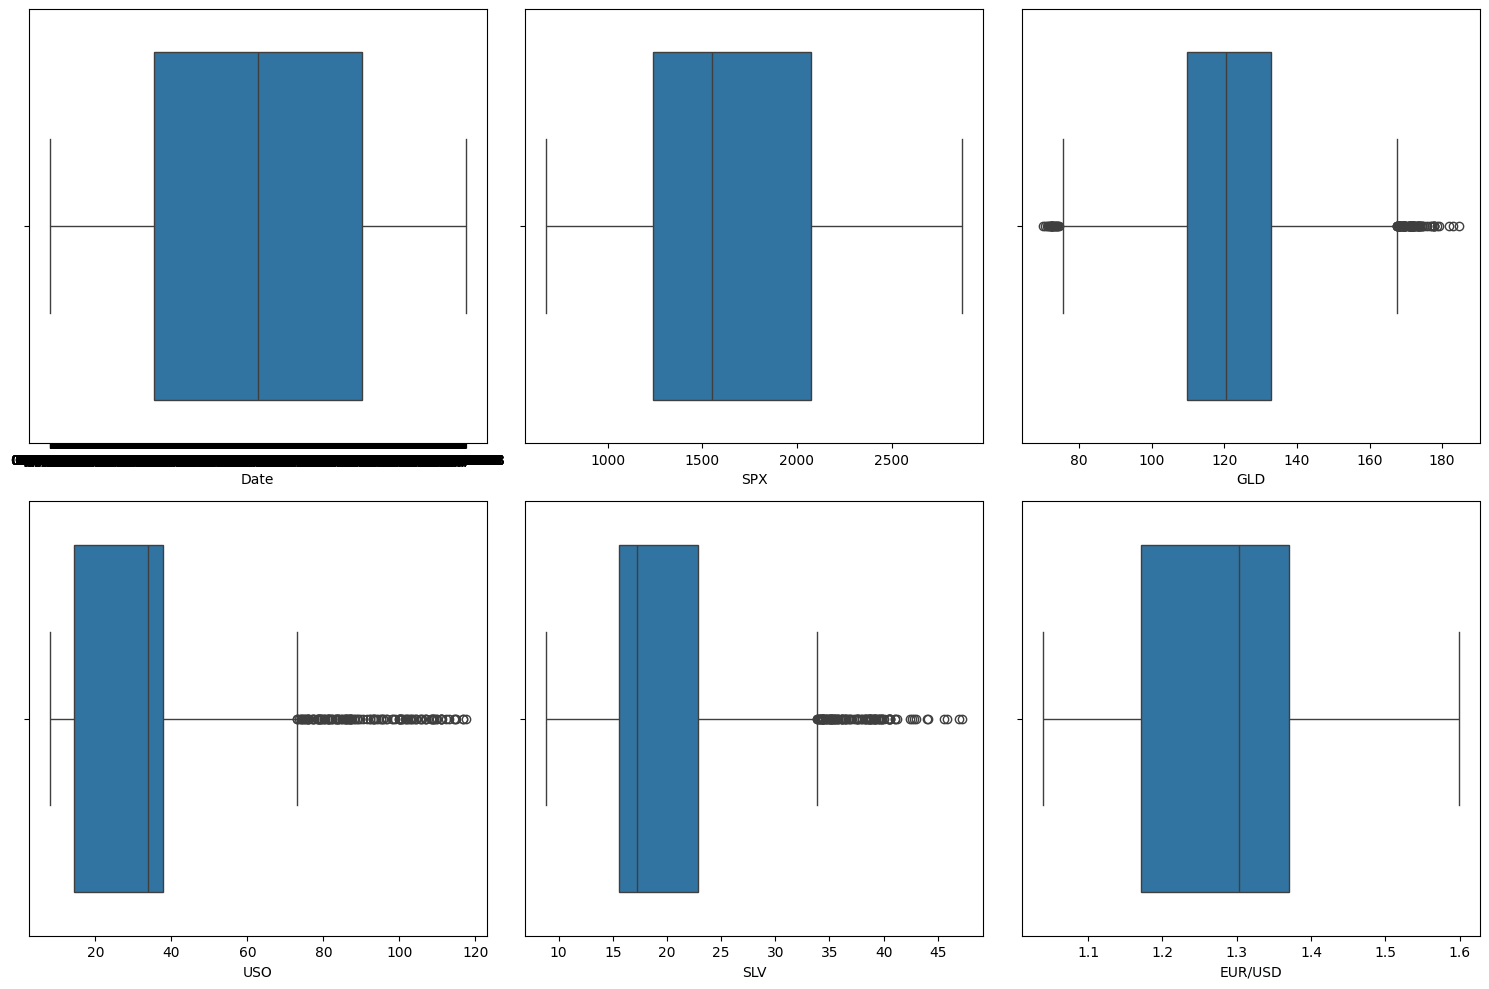

In [22]:
fig,axes = plt.subplots(2,3,figsize=(15,10))
for i,col in enumerate(df.columns):
    row,col_position = divmod(i,3)
    sns.boxplot(data=df,x=col,ax=axes[row,col_position])
    plt.tight_layout()
plt.show()


In [23]:
df['Date'] = pd.to_datetime(df['Date'])

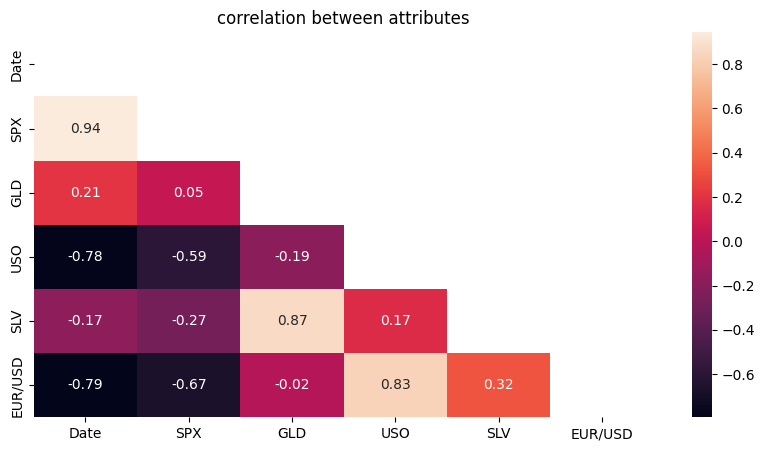

In [24]:
# plotting correlation heatmap
plt.figure(figsize=(10,5))
corr = df.corr()
mask = np.triu(corr)
sns.heatmap(corr, annot= True, mask= mask, fmt = '.2f')
plt.title("correlation between attributes")
plt.show()

In [26]:
corr['GLD']

,GLD
Date,0.209118
SPX,0.049345
GLD,1.000000
USO,-0.186360
SLV,0.866632
EUR/USD,-0.024375


<ipython-input-29-4b6d06389d95>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'],color='red',bins=100,),plt.title('Gold Price Distribution')


(<Axes: title={'center': 'Gold Price Distribution'}, xlabel='GLD', ylabel='Density'>,
 Text(0.5, 1.0, 'Gold Price Distribution'))

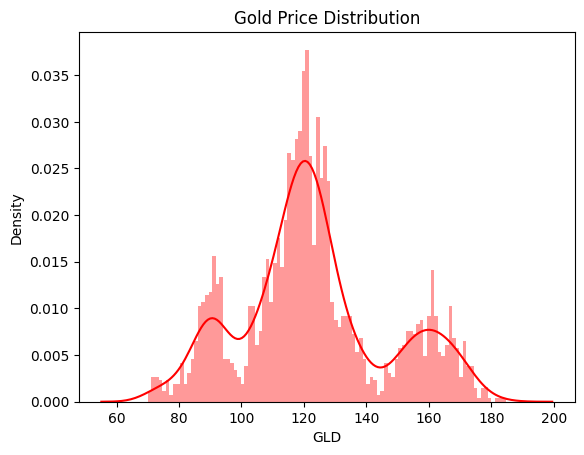

In [29]:
sns.distplot(df['GLD'],color='red',bins=100,),plt.title('Gold Price Distribution')

Text(0.5, 1.0, 'S&P 500 Index Over Time')

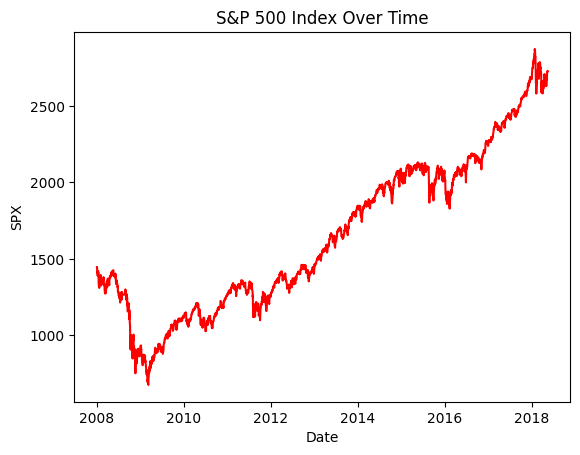

In [61]:

sns.lineplot(data=df,x='Date',y='SPX', color = 'red')
plt.title('S&P 500 Index Over Time')


In [66]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
    x=df['Date'],
    y=df['GLD'],
    mode='lines',
    name='Gold Price'
    )
)
fig.add_trace(
    go.Scatter(
    x=df['Date'],
    y=df['SLV'],
    mode='lines',
    name='SLV'
    )
)
layout2 = go.Layout(xaxis_title='Date', yaxis_title='Price', title='Gold Price, Spx, USO, SLV, and EUR/USD Over Time',template = 'plotly_dark')
fig.update(layout = layout2)
fig.show()

##Data Modeling

In [69]:
X = df.drop(['Date','GLD'],axis=1)
Y = df['GLD']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [72]:
Model = RandomForestRegressor(n_estimators=1000,max_depth=8, random_state=33)
Model.fit(X_train,y_train)


RandomForestRegressor(max_depth=8, n_estimators=1000, random_state=33)

In [73]:
test_data_prediction = Model.predict(X_test)

In [74]:
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9868395446271339


In [75]:
train_data_prediction = Model.predict(X_train)

In [77]:
error_score = metrics.r2_score(y_train, train_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.996067690457473


In [78]:
print(f'MAE value is  : {mean_absolute_error(y_test, test_data_prediction)}')
print(f'MSE value is  : {mean_squared_error(y_test, test_data_prediction)}')

MAE value is  : 1.6054872226426145
MSE value is  : 6.941396652059995
